Ques 1:What is Boosting in Machine Learning? Explain how it improves weak
learners.

Ans: Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to form a strong and accurate model. A weak learner is a model that performs only slightly better than random guessing (for example, a shallow decision tree).

How Boosting Works:

Boosting trains models sequentially, not independently. Each new model focuses more on the mistakes made by the previous models.

How Boosting Improves Weak Learners:

Sequential Learning:
Models are trained one after another. Each new learner learns from the errors of the earlier learners.

Increased Focus on Hard Examples:
Misclassified data points are given higher importance (weights) so future models pay more attention to them.

Weighted Combination of Models:
Final predictions are made by combining all weak learners, often giving more weight to better-performing models.

Reduction of Bias and Error:
By correcting previous mistakes step by step, boosting reduces bias and improves overall accuracy.

Ques 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

Ans: Difference between AdaBoost and Gradient Boosting (Training Process)

AdaBoost and Gradient Boosting are both boosting techniques, but they differ in how models are trained and how errors are handled.

AdaBoost trains models sequentially by adjusting the weights of training samples. After each weak learner is trained, more weight is given to the misclassified data points, so the next model focuses more on those difficult cases. Models that perform well are given higher importance in the final prediction.

Gradient Boosting, on the other hand, trains models sequentially by optimizing a loss function. Instead of reweighting data points, each new model is trained to predict the residual errors (gradients) of the previous model. This means every new learner corrects the mistakes by minimizing the overall loss using gradient descent.

Ques 3: How does regularization help in XGBoost?

Ans:
Regularization in XGBoost helps to prevent overfitting and improve the model’s ability to generalize to unseen data.

How Regularization Helps in XGBoost:

Controls Model Complexity
XGBoost adds regularization terms to its objective function that penalize complex trees. This discourages the model from creating overly deep or complicated trees.

Penalizes Large Weights:
Regularization reduces the impact of large leaf weights, ensuring predictions are not dominated by a few extreme values.

Limits Tree Structure:
Parameters like max_depth, min_child_weight, and gamma restrict tree growth, preventing unnecessary splits.

L1 and L2 Regularization:

L1 (alpha) encourages sparsity by removing less important features.

L2 (lambda) smooths leaf weights to reduce variance.

Why This Is Important:

By controlling complexity, regularization helps XGBoost:

Avoid fitting noise in training data

Improve performance on new data

Build more stable and reliable models

Ques 4:Why is CatBoost considered efficient for handling categorical data?

Ans:CatBoost is considered efficient for handling categorical data because it can use categorical features directly without extensive manual preprocessing, while also reducing overfitting.

Why CatBoost Handles Categorical Data Efficiently:

No Need for One-Hot Encoding:
CatBoost automatically processes categorical features, avoiding one-hot encoding, which can increase dimensionality and memory usage.

Ordered Target Encoding:
It uses an advanced ordered target encoding technique that converts categories into numerical values based on the target, while preventing target leakage.

Handles High-Cardinality Features Well:
CatBoost efficiently manages features with many unique categories (e.g., user IDs, product IDs) without causing model complexity to explode.

Reduces Overfitting:
By using ordered statistics instead of standard target encoding, CatBoost ensures that future data is not used when encoding current samples.

Minimal Feature Engineering:
Less preprocessing is required, making CatBoost easier to use and more reliable in real-world datasets with many categorical variables.

Ques 5:What are some real-world applications where boosting techniques are
preferred over bagging methods?

Ans:Boosting techniques are preferred in applications like finance, fraud detection, healthcare, and recommendation systems because they reduce bias, focus on hard-to-predict cases, and achieve higher predictive accuracy than bagging methods.

Ques6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

In [7]:
#Ans 6:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Make predictions
y_pred = ada.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


In [8]:
#QUES 7:Write a Python program to:
#● Train a Gradient Boosting Regressor on the California Housing dataset
#● Evaluate performance using R-squared score
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate model performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared Score:", r2)


Gradient Boosting Regressor R-squared Score: 0.7756446042829697


In [ ]:
#Ques 8: Write a Python program to:
#● Train an XGBoost Classifier on the Breast Cancer dataset
#● Tune the learning rate using GridSearchCV
#● Print the best parameters and accuracy
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the XGBoost Classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Define the parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Apply GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the model
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid.best_params_)
print("XGBoost Classifier Accuracy:", accuracy)


CatBoost Classifier Accuracy: 0.9649122807017544


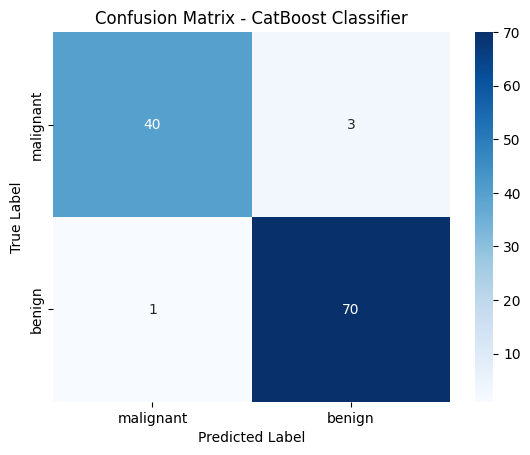

In [12]:
#Ques 9:Write a Python program to:
#● Train a CatBoost Classifier
#● Plot the confusion matrix using seaborn
# Import required libraries
!pip install catboost

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions (FIXED)
y_pred = model.predict(X_test).ravel().astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()



Ques 10:QUES 10:You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

ANS :
1️ Data Preprocessing & Feature Handling
a) Handling Missing Values

Numeric features: Impute using median (robust to outliers).

Categorical features: Impute using most frequent category or a special label like "Unknown".

* Tree-based boosting models handle missing values better than linear models, especially XGBoost and CatBoost.

b) Handling Categorical Variables

AdaBoost / XGBoost: Require encoding (One-Hot or Target Encoding).

CatBoost: Handles categorical features natively, no manual encoding needed.

* Since the dataset has many categorical features, CatBoost is a strong choice.

c) Handling Imbalanced Data

Use:

Class weights (higher weight to default cases)

Or SMOTE (only if needed)

Prefer class weights with boosting to avoid synthetic noise.

2️ Choice of Boosting Algorithm
 Final Choice: CatBoost

Why CatBoost?

Native handling of categorical variables

Built-in handling of missing values

Uses ordered boosting to reduce overfitting

Performs well on imbalanced financial datasets

# Alternative:

XGBoost if dataset is mostly numerical

AdaBoost only for small/simple datasets

3️ Hyperparameter Tuning Strategy
Key Parameters to Tune

learning_rate → controls speed of learning

depth → controls model complexity

iterations → number of trees

l2_leaf_reg → regularization to prevent overfitting

Strategy

Use GridSearchCV or RandomizedSearchCV

Apply Stratified K-Fold Cross-Validation to preserve class imbalance

Tune learning rate first, then depth and regularization

4️ Evaluation Metrics (Very Important for Imbalanced Data)

! Accuracy is NOT enough

 Preferred Metrics

Recall (Default class) → minimize false negatives (missed defaulters)

Precision → avoid rejecting good customers

F1-Score → balance between precision and recall

ROC-AUC → overall class separation ability

PR-AUC → better for highly imbalanced datasets

 Business focus: High Recall for defaulters

5️ Business Benefits of the Model
! Risk Reduction

Early identification of high-risk customers

Reduced loan defaults and financial loss

* Better Decision-Making

Data-driven approval and rejection

Risk-based interest rates

* Fair & Explainable Decisions

Feature importance from boosting models

Regulatory compliance support

* Scalability

Boosting models scale well with large FinTech datasets

Can be updated with new transaction data